<a href="https://colab.research.google.com/github/lakhanrajpatlolla/aiml-learning/blob/master/U3W14_47_Autoencoder_Word2vec_text_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


### Learning Objectives

At the end of the experiment, you will be able to :

* understand how to deal with the text preprocessing
* create effective semantic representations of variable sized text


In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="850" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Autoencoders_Word2vec_Walkthrough.mp4" type="video/mp4">
</video>
""")

### Dataset

In this experiment we use the 20 newsgroup dataset



#### Description

This dataset is a collection of approximately 20,000 newsgroup documents, partitioned nearly evenly across 20 different newsgroups. That is there are approximately one thousand documents taken from each of the following newsgroups:

    alt.athesim
    comp.graphics   
    comp.os.ms-windows.misc
    comp.sys.ibm.pc.hardware
    comp.sys.mac.hardware
    comp.windows.x
    misc.forsale
    rec.autos
    rec.motorcycles
    rec.sport.baseball
    rec.sport.hockey
    sci.crypt
    sci.electronics
    sci.med
    sci.space
    soc.religion.christian
    talk.politics.guns
    talk.politics.mideast
    talk.politics.misc
    talk.religion.misc

The dataset consists **Usenet** posts--essentially an email sent by someone to that newsgroup. They typically contain quotes from previous posts as well as cross posts; that is a few posts that may be sent to more than one newsgroup.

Each newsgroup is stored in a subdirectory, with each post stored as a separate file.

Data source to this experiment: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

### Domain Information


A newsgroup, despite the name, has nothing to do with news. It is what we would call today a mailing list or a discussion forum. *Usenet* is a distributed discussion system designed and developed in 1979 and deployed in 1980.  

Members joined newsgroups of interest to them and made *posts* to them. Posts are very similar to email -- in later years, newsgroups became mailing lists and people posted via email.  

### AI/ML Technique

#### Autoencoder

An autoencoder is a feedforward, non-recurrent neural network which is similar to a multilayer perceptron (MLP) – having an input layer, an output layer and one or more hidden layers connecting them. However, in an autoencoder, the output layer has the same number of nodes as the input layer and reconstructs its own inputs (instead of predicting the target value Y given inputs X).


An autoencoder is made up of two components- the encoder and the decoder network. The task of the encoder is to generate a lower-dimensional embedding Z, which is referred to as latent vector, or latent representation. After that, we have the decoder stage in which Z is reconstructed to X' prime, which is the same as X (input).


![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/6.png)


### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2418775" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959000490" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U3W14_47_Autoencoder_Word2vec_text_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip install torchvision")
    ipython.magic("sx pip install gensim")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week9/Exp2/AIML_DS_NEWSGROUPS_PICKELFILE.pkl.zip")
    ipython.magic("sx unzip AIML_DS_NEWSGROUPS_PICKELFILE.pkl.zip")
    ipython.magic("sx wget https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/experiment_related_data/AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.rar")
    ipython.magic("sx unrar e /content/AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.rar")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


**Note** : To Download "AIML_DS_NEWSGROUPS_PICKELFILE.pkl and AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin" file it will take time.

### Importing required packages

In [4]:
# Importing pytorch packages
import torch
from torch import nn
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms

import numpy as np
import gensim

# Matplotlib is used for ploting graphs
import matplotlib.pyplot as plt

### Loading the dataset

In [5]:
import pickle
dataset = pickle.load(open("AIML_DS_NEWSGROUPS_PICKELFILE.pkl",'rb'))
print(dataset.keys())

dict_keys(['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc'])


### Dividing the dataset into train and test

We will use 950 samples from each class in the training set, and the remaining 50 (Are you sure?)  in the test set.

In [6]:
train_set = {}
test_set = {}

# Clean dataset for text encoding issues :- Very useful when dealing with non-unicode characters
for key in dataset:
    dataset[key] = [[i.decode('utf-8', errors='replace').lower() for i in f] for f in dataset[key]]

# Break dataset into 95-5 split for training and testing
n_train = 0
n_test = 0
for k in dataset:
    split = int(0.95*len(dataset[k]))
    train_set[k] = dataset[k][0:split]
    test_set[k] = dataset[k][split:-1]
    n_train += len(train_set[k])
    n_test += len(test_set[k])

### Calculating the frequency of the words

As you might have realized, machine learning algorithms need good feature representations of different inputs. Concretely, we would like to represent each news article 𝐷 in terms of a feature vector 𝑉, which can be used for classification. Feature vector 𝑉 is made up of the number of occurrences of each word in the vocabulary. Let us count the number of occurrences of every word in the news documents in the training set.

In [7]:
import collections
import re
import operator
frequency = collections.defaultdict(int)

for key in train_set:
    for f in train_set[key]:

        # Find all words which consist only of capital and lowercase characters and are between length of 2-9.
        # We ignore all special characters such as !.$ and words containing numbers
        words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', ' '.join(f))

        for word in words:
            frequency[word] += 1

sorted_words = sorted(frequency.items(), key=operator.itemgetter(1), reverse=True)

### Preprocessing the data

Now we got some rough ideas about kind of words that appear frequently, and those that occur rarely, and we can observe that different words appear with different frequencies. The most common words appear in almost all documents. Hence, for a classification task, having information about those words' frequencies does not matter much since they appear frequently in every type of document. To get a good feature representation, we eliminate them since they do not add too much value. Additionally, notice how the least frequent words appear so rarely that they might not be useful either.

Let us pre-process our news articles now to remove the most frequent and least frequent words by thresholding their counts:

In [16]:
valid_words = collections.defaultdict(int)

print('Number of words before preprocessing:', len(sorted_words))

# Ignore the 25 most frequent words, and the words which appear less than 100 times
ignore_most_frequent = 25
freq_thresh = 100
feature_number = 0
for word, word_frequency in sorted_words[ignore_most_frequent:]:
    if word_frequency > freq_thresh:
        valid_words[word] = feature_number
        feature_number += 1

print('Number of words after preprocessing:', len(valid_words))

word_vector_size = len(valid_words)

Number of words before preprocessing: 89599
Number of words after preprocessing: 4096


### Loading the predefined word2vec file

we aim to predict the next word given the context in which the word appears. (For example, given the last 𝑛 words, predict the next word). A very smart way to do this is by using a feature representation called "Word2Vec" with transforms each word into 300-dimensional vectors.
Link to pretrained 300 dimensional word2vec: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download


Converting each document into average of the word2vec vectors of all valid words in document.


In [17]:
model = gensim.models.KeyedVectors.load_word2vec_format('AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin', binary=True, limit=500000)

### Function for word2vec

In [18]:
word2vec_vector_size = 300

'''
 This method converts documents to word vectors. It first checks if the word is valid according to our initial frequency
 threshold. Next, if it is, we add the precomputed word vectors together. If the word is valid, but we do not have a valid
 vector to represent the word, we add a random gaussian noise instead. Since we do not want to induce new noise each time,
 we store the same noise vector for training and test time in substitute_word_vecs variable.
'''
def convert_to_w2v(dataset, number_of_documents, substitute_word_vecs={}):
    d = {}
    labels = np.zeros((number_of_documents, 1))
    w2v_rep = np.zeros((number_of_documents, word2vec_vector_size))

    # Iterate over the dataset and split into words
    i = 0
    for label, class_name in enumerate(dataset):
        for f in dataset[class_name]:
            text = ' '.join(f).split(' ')
            valid_count = 1
            for word in text:

                # Check if word is valid or not according to original dataset pruning
                if word in valid_words:
                    try:
                        w2v_rep[i] += model[word]
                        d[word] = model[word]
                    except:
                        '''The word isn't in our pretrained word-vectors, hence we add a random gaussian noise
                         to account for this. We store the random vector we assigned to the word, and reuse
                         the same vector during test time to ensure consistency.'''

                        if word not in substitute_word_vecs.keys():
                            substitute_word_vecs[word] = np.random.normal(-0.25, 0.25, word2vec_vector_size)

                        w2v_rep[i] += substitute_word_vecs[word]

                    valid_count += 1

            # Average
            w2v_rep[i] = w2v_rep[i] / valid_count

            # Save label
            labels[i] = label

            i += 1

    return d, w2v_rep, labels, substitute_word_vecs

### Convert the train and test datasets into their word2vec representations

In [19]:
d_train,train_w2v_set, train_w2v_labels, substitute_word_vecs = convert_to_w2v(train_set, n_train)
d_test,test_w2v_set, test_w2v_labels,_ = convert_to_w2v(test_set, n_test, substitute_word_vecs)

In [20]:
len(d_train),train_w2v_set.shape, train_w2v_labels.shape, len(substitute_word_vecs)

(3655, (17878, 300), (17878, 1), 350)

### Defining the Model


Let us create an autoencoder architecture. Typically an autoencoder is made up of two components, the encoder network and the decoder network. Encoding network is made up of four layers where we are trying to compressing the data into 2 features which can be easily visualized in the plot.  Decoding network is made up of four layers.

The sentences in the documents as word2vec representation are fed into the encoder network, transformed into a semantic vector of fixed size, and then unfolded back into an ordered sentences in document.


In [21]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(300,100),
            nn.ReLU(),
            nn.Linear(100,30),
            nn.ReLU(),
            nn.Linear(30,30),
            nn.ReLU(),
            nn.Linear(30,2))
        self.decoder = nn.Sequential(
            nn.Linear(2,30),
            nn.ReLU(),
            nn.Linear(30,30),
            nn.ReLU(),
            nn.Linear(30,100),
            nn.ReLU(),
            nn.Linear(100,300))

    def forward(self, x):
        y = self.encoder(x)
        z = self.decoder(y)
        return y,z

### Calling the instances of the network

In [22]:
model = autoencoder()
model

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=30, bias=True)
    (5): ReLU()
    (6): Linear(in_features=30, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=300, bias=True)
  )
)

### Defining the loss function and optimizer

In [23]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Training the Model

1. Pass the data through the model.
2. Calculate the loss by comparing the reconstructed image with the original image
3. Train the model to minimize the reconstruction error which measures the diference between the original image and the consequent reconstructed image.

In [24]:
EPOCH = 10
for epoch in range(EPOCH):
    for i, (word, w2v) in enumerate(d_train.items()):
        b_x = torch.FloatTensor(np.array(w2v))     # Converting an array to a tensor

        # Passing the data to the model (Forward Pass)
        encoded, decoded = model(b_x)

        # Calculating mean square error loss between the reconstructed image and the original image
        loss = criterion(decoded, b_x)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Performing backward pass (Backpropagation)
        loss.backward()

        # optimizer.step() updates the weights accordingly
        optimizer.step()

    print("Loss:",float(loss))

Loss: 0.06697119772434235
Loss: 0.06581918895244598
Loss: 0.0649271234869957
Loss: 0.06419352442026138
Loss: 0.06359885632991791
Loss: 0.06309941411018372
Loss: 0.06267083436250687
Loss: 0.0622972697019577
Loss: 0.061970245093107224
Loss: 0.06168167293071747


We will convert training dataset first into a torch tensor, and form a differentiable Variable.

In [25]:
# Converting an array to a tensor
value = torch.Tensor(np.array(train_w2v_set))

# Passing the data to the model (Forward Pass)
encoder_values, decoder_values = model(value)

In [26]:
# Converting pytorch variable into numpy array
encode = encoder_values.data.numpy()
decode = decoder_values.data.numpy()

In [27]:
print(encode.shape, decode.shape)

(17878, 2) (17878, 300)


In [28]:
# Storing all the words in words list
words = []
for key in substitute_word_vecs:
    words.append(key)

### Visualization of encoded data

To visualize the higher dimensional data in 2D space, we can use autoencoders.

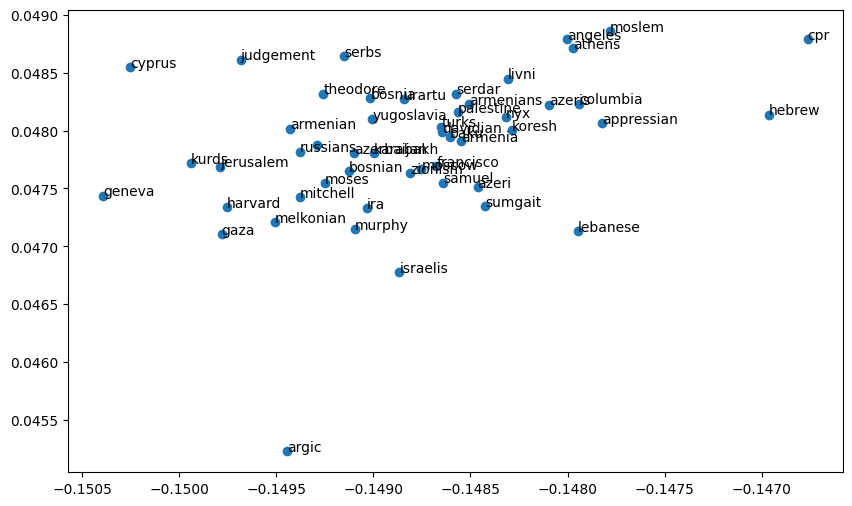

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(encode[:50,0],encode[:50,1])
for i in range(len(words[:50]) - 1):
    plt.annotate(words[i], xy = (encode[i][0],encode[i][1]))
plt.show()

### Please answer the questions below to complete the experiment:




In [8]:
#@title State True or False: In this experiment, Reconstruction error is different from loss function (MSE) which calculates the difference between output vector and input vector. { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE", "FALSE"]

In [9]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [10]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Good" #@param {type:"string"}


In [11]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [12]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [13]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [14]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [15]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1919
Date of submission:  22 Feb 2025
Time of submission:  16:15:16
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
